In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Intermediate Scientific Computing
By Fuad Jamari

## Task 1

Producing the N-body code

#### 1. Creating a class that represent each Argon gas particle.

- The class ```Body``` contains four main attributes which is position, velocity, acceleration and the mass of the particle.

- Class ```Body``` also consists of two methods which is ```dist``` that is used to calculate the distance between any two instances of class ```Body``` and ```speed``` that is used to calculate the total speed of an instance of class ```Body```. 

In [2]:
class Body :
    # The mass attribute is set to be the mass of one particle of Argon gas while the other vector attributes are set to zeros
    def __init__(self, position = np.zeros(3), velocity = np.zeros(3), acceleration = np.zeros(3), mass = 6.64*10**-26):
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.acceleration = np.array(acceleration)
        self.mass = mass
        
    # dist method is used to calculate the distance or separation between two instances of different positions
    def dist(self, others):
        distance = np.sqrt(sum((self.position - others.position)**2))
        # the method returns the sum of the square difference between the positions of two instances
        return distance
    
    # speed method calculate the magnitude of total speed of an instance 
    def speed(self):
        # the method returns the square root of the sum of all the velocity components of an instance
        return np.sqrt(sum(self.velocity[k]**2 for k in range(len(self.velocity))))

#### 2. Testing the attributes and methods of class ```Body```.

In [3]:
# initialised two instances of class Body 
# A has the initial position of [0,0,0] and initial velocity of [0, 0, 0]
A = Body(velocity=np.array([0,0,0]))
# B has the initial position of [1,2.5,0.5] and initial velocity of [0, 0, 0]
B = Body([1e-7,2.5e-7,0.5e-7],[0,0,0])

In [4]:
# finding the distance of separation between the position of A and B using dist method
B.dist(A)

2.73861278752583e-07

In [5]:
# finding the magnitude of total speed of A using speed method
A.speed()

0.0

In [6]:
# recalling the position of B using attribute position
B.position

array([1.0e-07, 2.5e-07, 5.0e-08])

#### 3. Create a function to calculate the force between two partcles.

- This is done by using the derivative of Lennard-Jones potential which is define as

$$ F = - \frac{dV}{dr} = \frac{24 \epsilon }{r} \displaystyle \Bigg[ 2\Bigg(\frac{\sigma}{r}\Bigg)^{12} - \Bigg(\frac{\sigma}{r}\Bigg)^{6} \Bigg]  $$, 

where  $r$ is the separation between two particles, $\epsilon = 125.7\times1.38\times10^{-23} J^{-1}K^2$  and  $\sigma = 0.3345 \times10^{-9} m$

- The function ```LJ_force``` that takes three inputs of ```r``` which is the separation distance in m and two real value constants for $\epsilon$ and $\sigma$. ```LJ_force``` returns the magnitude of force between two Argon gas particles represented by instances of class ```Body```.

In [7]:
# function LJ_force calculate the magnitude of force between two particles 
def LJ_force(r, eps, sigma):
    force = 24*eps*(2*(sigma/r)**12 - (sigma/r)**6)/r  
    return force

- Since we will only be working on Argon gas particles, the two inputs ```eps``` and ```sigma``` are fixed in throughout this investigation.

In [8]:
# initialised eps and sigma with the values determined in 3.
eps = 125.7*1.38*10**-23
sigma = 0.3345*10**-9

- Finding the force between particle A and particle B using ```LJ_force``` function and ```dist``` method from class ```Body``` to obtain the distance of separation, ```r```. 

In [9]:
LJ_force(A.dist(B), eps, sigma)

-5.047634691858751e-31

Remark : The negative value obtain from computing the force means that the net interaction between the both particles is attraction.

#### 4. Finding the net acceleration of Argon gas particles
- This can be done by referring to the equation of magnitude of force from the above to obtain the directional force formula. Say for a directional force in the direction of x-axis between from particle $i$ to particle $j$, we have
$$ F_{x_{ij}}= \frac{24 \epsilon }{r^2} \displaystyle \Bigg[ 2\Bigg(\frac{\sigma}{r}\Bigg)^{12} - \Bigg(\frac{\sigma}{r}\Bigg)^{6} \Bigg] (x_i - x_j)  $$, 

- Initialise another three instances of class ```Body``` to represent three Argon gas particles.

In [10]:
C = Body([.5e-7,2e-7,1e-7])
D = Body([1e-7,2.3e-7,.5e-7])
E = Body([2e-7,3e-7,.5e-7])

- Store the all of the instances of class ```Body``` into an array called ```N_Body``` that represent a system containing five Argon gas particles.

In [11]:
N_Body = np.array([A,B,C,D,E])

- Create a function ```calc_force_acc``` that takes the input of array containing instances of class ```Body``` and store the net accelerations of particles into the attribute ```acceleration``` of instances of class ```Body```.

In [12]:
# function calc_force_acc calculates the net acceleration of particles in a system
def calc_force_acc(N_Body, eps, sigma):
    for i in range(len(N_Body)):
        force = 0
        for j in range(len(N_Body)):
            # The net force of a particle is the sum of all directional force between the particle and other particles
            if N_Body[i] != N_Body[j]:
                r  = N_Body[i].dist(N_Body[j])
                force += LJ_force(r, eps, sigma)*(N_Body[j].position - N_Body[i].position)/r
        # store the ratio of the directional force and the particle mass into attribute acceleration 
        N_Body[i].acceleration = force / N_Body[i].mass

- Calculate the acceleration of all the particles in system ```N_Body``` using ```calc_force_acc```. 

In [13]:
calc_force_acc(N_Body, eps, sigma)

- Accessing the acceleration of particle B.

In [14]:
N_Body[1].acceleration

array([ 1.02843635e-02,  6.86170337e+02, -1.38776451e-02])

#### 5. Updating the state of Argon Gas particles in a system

- Creating ```update``` function that is used to update the position and velocity of all particles in a system using numerical integration method with deterministic time-step. This ```update``` function will record the updated position and velocity into the attribute ```position``` and ```velocity``` of class ```Body``` that represents the new position and velocity of particles after one time-step.

In [15]:
# update takes the array containing instances of class body, time-step dt, epsilon and sigma as inputs
def update(N_Body, dt, eps, sigma):
    # calculate the acceleration of all particles in a system 
    calc_force_acc(N_Body, eps, sigma)
    for i in range(len(N_Body)):
        # update the velocity of each particles by half of the time-step
        N_Body[i].velocity = N_Body[i].velocity + dt*N_Body[i].acceleration/2
        # update the position of each particles by full time-step
        N_Body[i].position = N_Body[i].position + dt*N_Body[i].velocity
    # calculate the acceleration of all particles in a system
    calc_force_acc(N_Body, eps, sigma)
    for i in range(len(N_Body)):
        # update the velocity of each particles by another half time-step
        N_Body[i].velocity = N_Body[i].velocity + dt*N_Body[i].acceleration/2

- Update the position and velocity of particles in system ```N_Body``` using ```update``` function.

In [16]:
update(N_Body,0.1, eps, sigma)

# print out the updated position of particles in a system after one increment of time-step of size 0.1
for i in N_Body:
    print(i.position)

[-6.96356896e-08 -2.09792718e-07 -7.74593805e-08]
[ 5.15218174e-05  3.43085194e+00 -6.93382257e-05]
[-0.00025096 -0.00017809  0.0002509 ]
[ 1.72417734e-04 -3.43068848e+00 -1.81141347e-04]
[ 2.75386549e-05  1.58272607e-05 -9.56070818e-08]


In [17]:
# print out the updated velocity of particles in a system after one increment of time-step of size 0.1
for i in N_Body:
    print(i.velocity)

[-6.96356896e-07 -2.09792718e-06 -7.74593805e-07]
[ 5.14218174e-04  3.43085169e+01 -6.93882257e-04]
[-0.00251009 -0.00178294  0.00250803]
[ 1.72317734e-03 -3.43068871e+01 -1.81191347e-03]
[ 2.73386549e-04  1.55272607e-04 -1.45607082e-06]


#### 6. Testing the validity of the N-body system

- To demonstrate the N-Body system for Argon gas particle, we run a simulation that updates the position and velocity of two particles for 200 increments. In each of the increment, the separation distance between the two particles and the magnitude of acceleration acted on particles are recorded.

In [18]:
# create two instances of class Body called s1 and s2 to represent two gas particles
s1 = Body([1e-7,2e-7,6e-7])
s2 = Body([1e-7,2e-7,-5e-7])

# create a system of N-body contains the two gas particles
sample = np.array([s1,s2])
r0 = np.array([s1.dist(s2)])

# create an empty array to store the value of separaion between the two particles after each update
dist = []
# create two empty arrays to store the magnitude of magnitude of acceleration acted on particles after each update
acc1 = []
acc2 = []

# run the simulation for 200 increments
for i in range(200):
    # calculate and store the value of separation between the two particles using dist method
    dist.append(sample[0].dist(sample[1]))
    # update the position and velocity of the gas particles 
    update(sample, 0.1, eps, sigma)  
    mag_acc1 = 0
    mag_acc2 = 0
    # calculate and store the magnitude of acceleration acted on each particles using attribute acceleration
    for i in range(3):
        mag_acc1 += np.power(sample[0].acceleration[i], 2)
        mag_acc2 += np.power(sample[1].acceleration[i], 2)
    acc1.append(np.sqrt(mag_acc1))
    acc2.append(np.sqrt(mag_acc2))

- Study the trend of the results between the separation and the force acted upon each particles

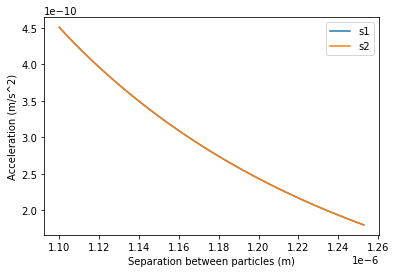

In [19]:
fig, ax = plt.subplots()

plt.plot(dist, acc1, label="s1")
plt.plot(dist, acc2, label="s2")
plt.xlabel("Separation between particles (m)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.show()

Remark : Observe that the magnitude of acceleration of both particles ```s1``` and ```s2``` are equal to each other throughout the simulations of 200 increments. This is due to how the acceleration acted on both particles are due to the repulsion and attraction from both particles without any other external factors. Besides, the acceleration of both particles reduces as the separation between the particles increases. This follows the Lennard-Jones potential where the separation, $r$ is the denominator or reducing factor of the force.

- Next, we study the relationship between Lennard-Jones potential for different separation, $r$ with the magnitude of the acceleration of the particles. This is to study whether the updated position and velocity of the particles in the N-body follows the Lennard-Jones potential.

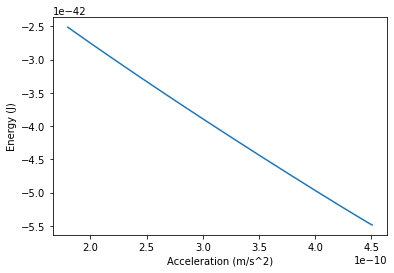

In [20]:
# create function LJP that takes size of separation, epsilon and sigma and return the LJ potential
def ljp(r, epsilon, sigma):
    return 4 * epsilon * np.power(sigma, 12) / np.power(r, 12) - 4 * epsilon * np.power(sigma, 6) / np.power(r, 6)

# store the value of LJ potential for separation of particles recorded in the simulations
energy = ljp(dist, 125.7*1.38*10**-23, 0.3345*10**-9)

# plot graph of energy against the magnitude of acceleration of particle s1
plt.plot(acc1, energy)

plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Energy (J)')
plt.show()

Remark : The sign of the Lennard-Jones potential is negative, hence shows that the motions of the particles ```s1``` and ```s2``` are due to attractive force acting between both of the particles. Also, the the curve shows that the acceleration of the particles in the N-body system is proportional to the value of Lennard-Jones potential. This shows that the N-body system obeys Lennard-Jones potential. 

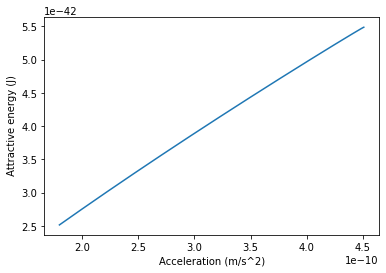

In [21]:
plt.plot(acc1, -energy)

plt.xlabel('Acceleration (m/s^2)')
plt.ylabel(' Attractive energy (J)')
plt.show()

#### 7. Simulating a test case
- Creating a simulation of interaction between two Argon particles say ```k1``` and ```k2``` defined as instances of class ```Body``` in an N-body system. The simulation will be running for 200 increments of time step 0.1s. The initial positions and initial velocities for both particles are set to be nonzero vectors.

In [22]:
# create two instances of class Body called s1 and s2 to represent two gas particles
k1 = Body([1e-7,2e-7,6e-7],[-1e-7,-2e-7,-6e-7])
k2 = Body([1e-7,2e-7,-6e-7],[-1e-7,-2e-7,-4e-7])

# store the two instances into an array representing an N-body
sample = np.array([k1,k2])

# initialise an empty array to store the updated positions of particles
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []

# run the simulation for 200 increments
for i in range(200):
    # update the position and velocity of the gas particles 
    update(sample, 0.1, eps, sigma)  
    x1.append(sample[0].position[0])
    y1.append(sample[0].position[1])
    z1.append(sample[0].position[2])
    x2.append(sample[1].position[0])
    y2.append(sample[1].position[1])
    z2.append(sample[1].position[2])

- Plot the full trajectories of both particles ```k1``` and ```k2``` during the whole simulation.

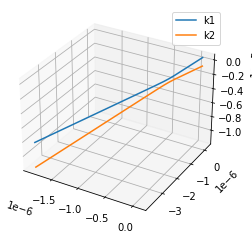

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1,y1,z1, label="k1")
ax.plot(x2,y2,z2, label="k2")
plt.legend()
plt.show()

Remark : There are slight bent on both trajectories indicating a force of attraction between both particles at a certain amount of separation.

## Task 2
Particles in a box

#### 1. Create a class that represent a system of N-body in an enclosed volume 

- Class ```N``` takes three main inputs as attributes. The first input ```n``` will be stored into attribute ```number``` that represent the total amount of particles in the system. Whereas the second input ```L``` is the length of the enclosed container for our system which will be stored in the ```wall``` attribute as the half of the length of the enclosed container. Upon initialising of an instance of class ```N```, the instance will have one empty array as the attribute ```Body```.

- Class ```N``` has two methods ```init_vel``` and ```init_pos``` that are used to generate a random initial positions and velocities of particles contains in the system of N-body. ```init_vel``` method takes input ```unit``` which represents the unit of our generated initial velocity with ```unit = 1``` being the SI unit, e.g m/s.

- Using method ```create_body``` to generate the initial states of the particles in the N-body. Carefully noted that the particles contains in instance of class ```N``` are instances of class ```Body``` from Task 1 with randomly generated position for ```position``` attribute and randomly generated velocity for ```velocity``` attribute. ```create_body``` method takes input of initial acceleration ```acc```, mass of particle ```m```, units for position ```pos_unit``` and units for velocity ```vel_unit```. The instances of body created by this method will be stored in the array as the attribute of ```Body``` of class ```N```.

- Class ```N``` also consists of method ```calc_force_acc``` that is similar to the one in Task 1 that takes input ```eps``` for the value of $\epsilon$ and ```sigma``` for the value of $\sigma$.

- Class ```N``` also has adapted version of ```update``` function from Task 1 called ```full_update```, but with the restriction on elastic collision between the particles and the walls of the enclosed container. ```full_update``` takes input time-step ```dt```, ```eps``` for the value of $\epsilon$ and ```sigma``` for the value of $\sigma$.


In [24]:
class N:
    # to create instance of class N, input the number of particles and the length of wall
    def __init__(self, n, L):
        self.number = n
        self.wall = L/2
        # initialising of empty array for attribute Body
        self.Body = []
    
    # method to randomly generate the initial velocity of particles
    def init_vel(self, unit = 1):
        vel = []
        for i in range(3):
            # the magnitude for the velocity are decimals chosen randomly between -1 and 1 times by the chosen units
            vel.append(random.uniform(-1,1)*unit)
        return vel

    # method to randomly generate the initial position of particles
    def init_pos(self, unit = 1):
        pos = []
        for i in range(3):
            # the scale of position of particles are decimals chosen randomly between -1 and 1 
            # times by half of the length of the enclosed container
            pos.append(random.uniform(-1,1)*unit)
        return pos
    
    # method to create initialised the system with N number of particles 
    # create_body takes inputs acceleration acc, mass of particles m and velocity units vel_unit
    def create_body(self, acc = np.zeros(3), m = 6.64*10**-23, vel_unit = 1, pos_unit = 1):
        for i in range(self.number):
            # randomly generate initial position and initial velocity
            pos = self.init_pos(unit = pos_unit)
            vel = self.init_vel(unit = vel_unit)
            # store the particles as a class Body into the empty array of attribute Body in class N 
            self.Body.append(Body(position = pos, velocity = vel, acceleration = acc, mass = m))

    # method to calculate the net acceleration of particles in a system
    def calc_force_acc(self, eps, sigma):
        for i in range(len(self.Body)):
            force = 0
            for j in range(len(self.Body)):
                # The net force of a particle is the sum of all directional force between the particle and other particles
                if self.Body[i] != self.Body[j]:
                    r = self.Body[i].dist(self.Body[j])
                    force += LJ_force(r, eps, sigma)*(self.Body[j].position - self.Body[i].position)/r
            # store the ratio of the directional force and the particle mass into attribute acceleration 
            self.Body[i].acceleration = force/self.Body[i].mass
            
    # method to update the position and velocity of particles in the system after time-step dt
    def full_update(self, dt, eps, sigma):
        # calculate the acceleration of all particles in a system 
        self.calc_force_acc(eps, sigma)
        for i in range(len(self.Body)):
            # update the velocity of each particles by half of the time-step
            self.Body[i].velocity = self.Body[i].velocity + dt*self.Body[i].acceleration/2
            # update the position of each particles by full time-step
            self.Body[i].position = self.Body[i].position + dt*self.Body[i].velocity
            for k in range(len(self.Body[i].position)):
                # if the position of the updated particles are outside of the enclosed container do
                if (abs(self.Body[i].position[k]) > self.wall):
                    # change the direction of the velocity of the particles
                    self.Body[i].velocity[k] = - self.Body[i].velocity[k]
                    # re-update the position of the particles
                    self.Body[i].position[k] = self.Body[i].position[k] + dt*self.Body[i].velocity[k]
        # calculate the acceleration of all particles in a system
        self.calc_force_acc(eps, sigma)
        for i in range(len(self.Body)):
            # update the velocity of each particles by another half time-step
            self.Body[i].velocity = self.Body[i].velocity + dt*self.Body[i].acceleration/2


#### 2. Test case for elastic collision of Argon gas particle with the walls 

- Run a simulation for 300 increments of time-step of size 0.1 s to investigate the elastic motion between an Argon gas particle and the wall. 

In [95]:
# intialising empty arrays to store the coordinates of each particles during every increments
x = []
y = []
z = []

# set the directional pressure for the simulation to be zero vector
P = np.zeros(3)

# setting of time-step and initialising our N-body system with 1 Argon particles and 1e-6m of container length
dt = 0.1
Ar = N(1,1e-6)
# randomly generate the initial states of of the particles in the N-body system
Ar.create_body(pos_unit = 1e-7, vel_unit = 1e-7)

for i in range(300):
    # update the positions and velocities of the particle
    Ar.full_update(dt, eps, sigma)
    # incremently stores the current positions of the particles
    x.append(Ar.Body[0].position[0])
    y.append(Ar.Body[0].position[1])
    z.append(Ar.Body[0].position[2])

- Plot the whole route taken by the Argon gas particle in three dimensional space.

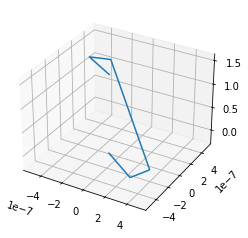

In [96]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x,y,z)
plt.show()

Remark : Observe how the trajectory of the particle changes when it hits the wall of the enclosed container. This shows that the particle in the N-body system has ellastic collision with the wall of the container.

- Plot the position of the Argon gas particle on each axes against time to study the collision of the particles with vertical and horizontal walls. 

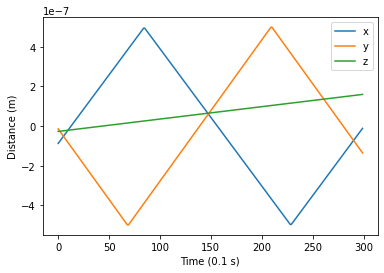

In [97]:
fig, ax = plt.subplots()

ax.plot(range(300), x, label="x")
ax.plot(range(300), y, label="y")
ax.plot(range(300), z, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

Remark : The above diagram shows when and at which sides of the wall that the particle hits and reflected from during the whole simulation.

## Task 3
Investigate

#### 1. Create functions to calculate total kinetic energy and temperature of an N-body system.
 - Using the suggested equation for total kinetic energy, 
 $$ E = \sum^{N}_{i} \frac{1}{2}m_i v^2_i = \frac{3}{2}Nk_BT,$$
to create function ```kinetic_energy``` that takes input of instance of class ```N``` and return the total kinetic energy of the N-body system. Furthermore, function ```temperature``` takes input of instance of class ```N``` and return the temperature of the N-body system of the instance by making use of function ```kinetic_energy```.


In [28]:
# takes input of instance of class N and returns the total kinetic energy in J
def kinetic_energy(N):
    KE = 0
    for i in N.Body:
        spd = i.speed()
        KE += 0.5*i.mass*(spd**2)
    return KE

# takes input of instance of class N and returns the temperature in K
def temperature(N):
    KE = kinetic_energy(N)
    return KE*2/(3*(len(N.Body)*1.38*10**-23))

- Test function ```kinetic_energy``` using the previous instance from Task 2.

In [29]:
Ar = N(40,1*1e-6)
# randomly generate the initial states of all of the particles in the N-body system
Ar.create_body(pos_unit=1e-7,vel_unit=10)

kinetic_energy(Ar)

1.354370728734918e-19

- Test function ```temperature``` using the previous instance from Task 2.

In [30]:
temperature(Ar)

163.5713440501109

#### 2. Create functions to calculate total directional pressure of an N-body system.
 - Using the suggested equation, 
$$P_x = \frac{1}{A\Delta t}\sum m_iv_{x,i}$$
to create function ```pressure``` that takes input of instance of class ```N```  and time-step ```dt``` and return vector of directional pressure of the N-body system.

In [31]:
def pressure(N, dt):
    P = np.zeros(3)
    for j in range(3):
        P[j] = (sum(i.mass * np.sign(i.velocity[j]) * i.velocity[j] for i in N.Body)/((2*N.wall)**2 * dt))
    return P

- Test function ```pressure``` using the previous instance from Task 2.

In [32]:
pressure(Ar, 0.1)

array([1.36603596e-07, 1.26698271e-07, 1.32397123e-07])

#### 3. Investigating the change in pressure when the volume of enclosed container is changed.

- To study this behaviour, we run a simulation for different length of enclosed container sets by the declaration of attribute ```wall``` in class ```N```. The simulation will be repeated for length of enclosed container ranging from 1m to 20m. All of the simulation will be running for 100 increments of time-step 0.1s. 

- The value of directional pressure will be stored into three different arrays according to the axes of the direction which are ```P_x``` for pressure acting on yz-plane, ```P_y``` for pressure acting on xz-plane and ```P_z``` for pressure acting on xy-plane. 

- The value for the directional pressure is recorded by averaging the directional pressure of th N-body system during the whole simulation of 100 time increments.

- For each simulation, the value of cross sectional area of the enclosed container is recorded into array ```A```. 

Example : Below is a test run of a simulation for the N-body particle with three Argon particles with conditions setting of 100 increments of time-step 0.1s and length of enclosed container of 1m.

In [104]:
# intialising empty arrays to store the coordinates of each particles during every increments
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
x3 = []
y3 = []
z3 = []

# set the directional pressure for the simulation to be zero vector
P = np.zeros(3)

# setting of time-step and initialising our N-body system with three Argon particles and 1m of container length
dt = 0.1
Ar = N(3,1)
# randomly generate the initial states of all of the particles in the N-body system
Ar.create_body(pos_unit = 0.1, vel_unit = 1)

for i in range(100):
    # update the positions and velocities of all three particles
    Ar.full_update(dt, eps, sigma)
    # incremently stores the current positions for all three particles
    x1.append(Ar.Body[0].position[0])
    y1.append(Ar.Body[0].position[1])
    z1.append(Ar.Body[0].position[2])
    x2.append(Ar.Body[1].position[0])
    y2.append(Ar.Body[1].position[1])
    z2.append(Ar.Body[1].position[2])
    x3.append(Ar.Body[2].position[0])
    y3.append(Ar.Body[2].position[1])
    z3.append(Ar.Body[2].position[2])
    # find the sum of total directional pressure during the whole simulation
    P += pressure(Ar, dt)

# evaluate the directional preesure as the average of total directional pressure during the whole simulation
P = P/100

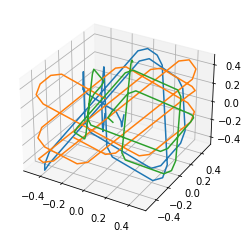

In [105]:
# visualise the whole trajectories of the three particles during the simulation
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1,y1,z1, label="particle 1")
ax.plot(x2,y2,z2, label="particle 2")
ax.plot(x3,y3,z3, label="particle 3")
plt.show()

- Visualise the trajectories of each particles on different axes to determine elastic collisions with walls of container.

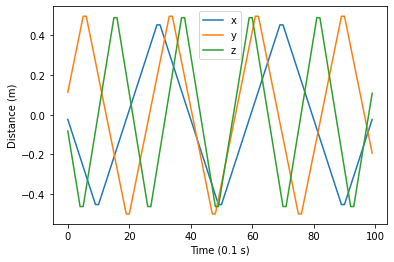

In [106]:
# particle 1
fig, ax = plt.subplots()

ax.plot(range(100), x1, label="x")
ax.plot(range(100), y1, label="y")
ax.plot(range(100), z1, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

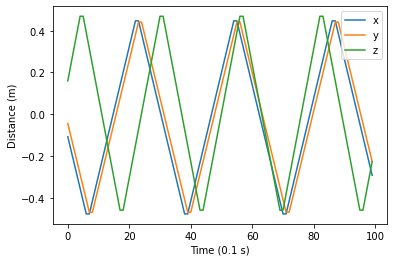

In [107]:
# particle 2
fig, ax = plt.subplots()

ax.plot(range(100), x2, label="x")
ax.plot(range(100), y2, label="y")
ax.plot(range(100), z2, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

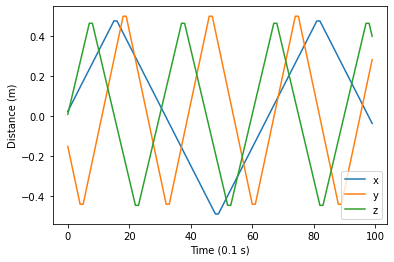

In [108]:
# particle 3
fig, ax = plt.subplots()

ax.plot(range(100), x3, label="x")
ax.plot(range(100), y3, label="y")
ax.plot(range(100), z3, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

- Extracting the total average pressure from the simulation

In [109]:
# obtaining the average directional pressure of the N-body system throughout the simulation
print("The total average pressure of the N-body system with container of length 1m is ", sum(P),"Pa")

The total average pressure of the N-body system with container of length 1m is  3.896390285545651e-21 Pa


Remark : All particles undergo elastic collisions with the container walls using this simulation. Hence, one can study the pressure in the N-body system of Argon gas particle using this simulation. However, this investigation do not include the whole visualisation for the trajectories of the tested particles due to the amount of particles tested.

##### (a) 
Investigation of the pressure due cross sectional area of the enclosed container ranging from 1m to 20m for N-body system of 40 Argon particles with running simulation of 100 increments of time-step 0.1s.

In [39]:
# initialised four empty arrays to store the value of area and the directional pressure for each simulations
A = []
P_x = []
P_y = []
P_z = []

# make simulations of particles for container of length 1 to 20
for i in range(1,21):
    # set the total directional pressure for the simulation to be zero
    P_xi = 0
    P_yi = 0
    P_zi = 0
    
    # declare the time-step used which is 0.1s
    dt = 0.1
    # initialised an N-body system containing 20 Argon gas particles inside an enclosed container
    Ar = N(40,i)
    # randomly generate the initial states of all of the particles in the N-body system
    Ar.create_body(pos_unit=0.1,vel_unit=1)
    # store the cross sectional area of the container in array A
    A.append((Ar.wall)**2)
    
    # starts the simulation of moving particles in the N-body system
    for i in range(100):
        # update the position and velocity of all the particles in the N-body system
        Ar.full_update(dt, eps, sigma)
        # find the sum of total directional pressure during the whole simulation
        P_xi += pressure(Ar, dt)[0]
        P_yi += pressure(Ar, dt)[1]
        P_zi += pressure(Ar, dt)[2]
    # calculate and store the average value of directional pressure for different length of container 
    P_x.append(P_xi/100)
    P_y.append(P_yi/100)
    P_z.append(P_zi/100)

- Start off by plotting all of the directional pressure ```P_x```, ```P_y``` and ```P_z``` against the cross sectional area of container, ```A```.

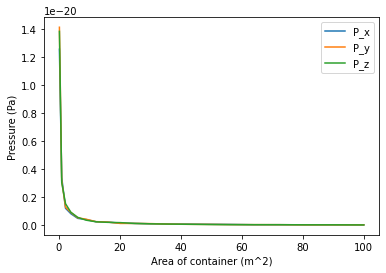

In [40]:
fig, ax = plt.subplots()


ax.plot(A, P_x, label="P_x")
ax.plot(A, P_y, label="P_y")
ax.plot(A, P_z, label="P_z")
plt.xlabel('Area of container (m^2)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.show()

- Plot the total pressure in the container, ```P = P_x + P_y + P_z``` against the cross sectional area of the container, ```A```.

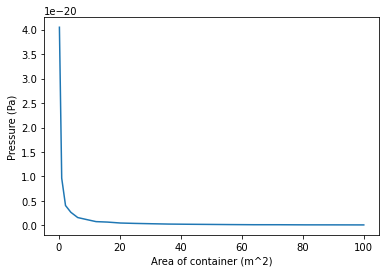

In [41]:
fig, ax = plt.subplots()
P = np.array(P_x) + np.array(P_y) + np.array(P_z)

plt.xlabel('Area of container (m^2)')
plt.ylabel('Pressure (Pa)')
ax.plot(A, P, label="P")
plt.show()

- To further investigate the approximate trend of the changing in pressure due to area of container, plot the total pressure ```P``` against the inverse value of tested area of container, ```inverse_A = 1/A```.

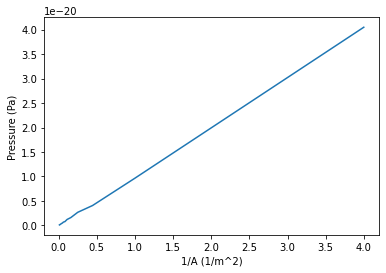

In [42]:
inverse_A = [1/A[i] for i in range(len(A))]

fig, ax = plt.subplots()
P = np.array(P_x) + np.array(P_y) + np.array(P_z)

ax.plot(inverse_A, P, label="P")
plt.xlabel('1/A (1/m^2)')
plt.ylabel('Pressure (Pa)')
plt.show()

Remark : The simulations for this investigation use specifications and conditions similar to those in the example in 3. Although, the overall trend of the curve seems quite reasonable, this simulation may benefits from some modifications to make the scale for the cross sectional area of the enclosed container and pressure to be more acceptable. This can be done by changing the range values for the length of the enclosed container and the time step of the simulations.

#### (b)
Investigation of the pressure due cross sectional area of the enclosed container ranging from $100$nm to $2000$nm for N-body system of 40 Argon particles with running simulation of 100 increments of time-step $1.0 \times 10^{-11}$s.

In [81]:
# initialised four empty arrays to store the value of area and the directional pressure for each simulations
A = []
P_x = []
P_y = []
P_z = []

# make simulations of particles for container of length 1 to 20
for i in range(1,21):
    # set the total directional pressure for the simulation to be zero
    P_xi = 0
    P_yi = 0
    P_zi = 0
    
    # declare the time-step used which is 0.1s
    dt = 1e-11
    # initialised an N-body system containing 20 Argon gas particles inside an enclosed container
    Ar = N(40,i*1e-6)
    # randomly generate the initial states of all of the particles in the N-body system
    Ar.create_body(pos_unit=1e-7,vel_unit=1e-7)
    # store the cross sectional area of the container in array A
    A.append((Ar.wall)**2)
    
    # starts the simulation of moving particles in the N-body system
    for i in range(100):
        # update the position and velocity of all the particles in the N-body system
        Ar.full_update(dt, eps, sigma)
        # find the sum of total directional pressure during the whole simulation
        P_xi += pressure(Ar, dt)[0]
        P_yi += pressure(Ar, dt)[1]
        P_zi += pressure(Ar, dt)[2]
    # calculate and store the average value of directional pressure for different length of container 
    P_x.append(P_xi/100)
    P_y.append(P_yi/100)
    P_z.append(P_zi/100)

- Start off by plotting all of the directional pressure ```P_x```, ```P_y``` and ```P_z``` against the cross sectional area of container, ```A```.

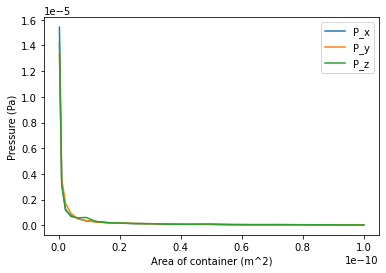

In [82]:
fig, ax = plt.subplots()


ax.plot(A, P_x, label="P_x")
ax.plot(A, P_y, label="P_y")
ax.plot(A, P_z, label="P_z")
plt.xlabel('Area of container (m^2)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.show()

- Plot the total pressure in the container, ```P = P_x + P_y + P_z``` against the cross sectional area of the container, ```A```.

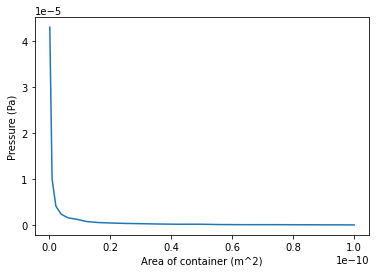

In [83]:
fig, ax = plt.subplots()
P = np.array(P_x) + np.array(P_y) + np.array(P_z)

plt.xlabel('Area of container (m^2)')
plt.ylabel('Pressure (Pa)')
ax.plot(A, P, label="P")
plt.show()

- To further investigate the approximate trend of the changing in pressure due to area of container, plot the total pressure ```P``` against the inverse value of tested area of container, ```inverse_A = 1/A```.

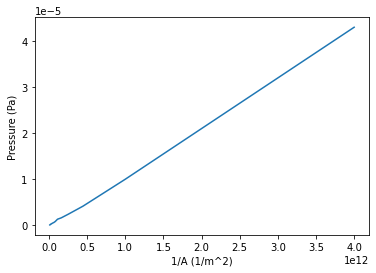

In [84]:
inverse_A = [1/A[i] for i in range(len(A))]

fig, ax = plt.subplots()
P = np.array(P_x) + np.array(P_y) + np.array(P_z)

ax.plot(inverse_A, P, label="P")
plt.xlabel('1/A (1/m^2)')
plt.ylabel('Pressure (Pa)')
plt.show()

Remark : Although, the overall trend of the curve is similar to the one obtained in 3(a), the scale for the values of cross sectional area of the enclosed container and pressure are more reasonable (e.g not too small).

#### 4. Investigating the change in pressure when the temperature is changed.
- From the given equation one can formulate the formula for temperature in terms of total kinetic energy in terms of speed of particles, $v$

$$ T = \frac{2}{3Nk_B}\sum^{N}_{i} \frac{1}{2}m_i v^2_i$$,

where $T$ is temperature in Kelvin, $N$ is the number of gas particles, $k_B$ is the Boltzmann constant and $v$ be the speed of each particles in the N-Body.

$$ v = \sqrt{x^2 + y^2 + z^2}$$.

- From this understanding, we can actually alter the temperature of the N-body system by changing the initial velocities of the particles in the N-body system. This can be done by multiplying the initial velocity by the scale of non-negative value when running each simulation. 

- To study this behaviour, we run a simulation for different initial velocity of Argon gas particle in class  ```N```. The simulation will be repeated for double the magnitude of the initial velocity of previous simulation. All of the simulation will be running for 100 increments of time-step 0.1s. 

- The value of directional pressure will be stored into three different arrays according to the axes of the direction which are ```P_x``` for pressure acting on yz-plane, ```P_y``` for pressure acting on xz-plane and ```P_z``` for pressure acting on xy-plane. 

- The value for the directional pressure is recorded by averaging the directional pressure of th N-body system during the whole simulation of 100 time increments.

- For each simulation, the temperature of the N-body system is recorded into array ```T```.

Example : Below is a test run of simulation for the N-body particle with three Argon particles with conditions setting of 100 increments of time-step 0.1s and initial velocity of particles ranging around $0.5ms^{-1}$.

In [116]:
# intialising empty arrays to store the coordinates of each particles during every increments
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
x3 = []
y3 = []
z3 = []

# set the temperature of the system for the simulation to be zero
T = 0
# set the directional pressure for the simulation to be zero vector
P = np.zeros(3)

# setting of time-step and initialising our N-body system with three Argon particles and 1m of container length
dt = 0.1
Ar = N(3,1)
# randomly generate the initial states of all of the particles in the N-body system
Ar.create_body(pos_unit = 0.1, vel_unit = 1)

T = temperature(Ar)

for i in range(100):
    # update the positions and velocities of all three particles
    Ar.full_update(dt, eps, sigma)
    # incremently stores the current positions for all three particles
    x1.append(Ar.Body[0].position[0])
    y1.append(Ar.Body[0].position[1])
    z1.append(Ar.Body[0].position[2])
    x2.append(Ar.Body[1].position[0])
    y2.append(Ar.Body[1].position[1])
    z2.append(Ar.Body[1].position[2])
    x3.append(Ar.Body[2].position[0])
    y3.append(Ar.Body[2].position[1])
    z3.append(Ar.Body[2].position[2])
    # find the sum of total directional pressure during the whole simulation
    P += pressure(Ar, dt)

# evaluate the directional preesure as the average of total directional pressure during the whole simulation
P = P/100

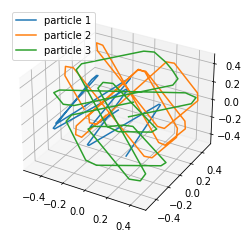

In [117]:
# visualise the whole trajectories of the three particles during the simulation
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1,y1,z1, label="particle 1")
ax.plot(x2,y2,z2, label="particle 2")
ax.plot(x3,y3,z3, label="particle 3")
plt.legend()
plt.show()

- Visualise the trajectories of each particles on different axes to determine elastic collisions with walls of container.

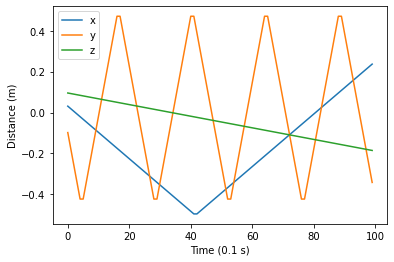

In [118]:
# particle 1
fig, ax = plt.subplots()

ax.plot(range(100), x1, label="x")
ax.plot(range(100), y1, label="y")
ax.plot(range(100), z1, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

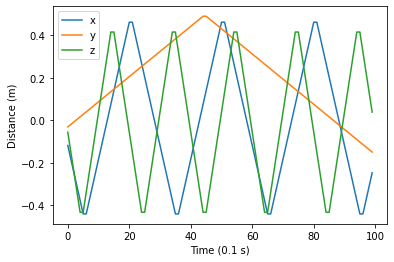

In [119]:
# particle 2
fig, ax = plt.subplots()

ax.plot(range(100), x2, label="x")
ax.plot(range(100), y2, label="y")
ax.plot(range(100), z2, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

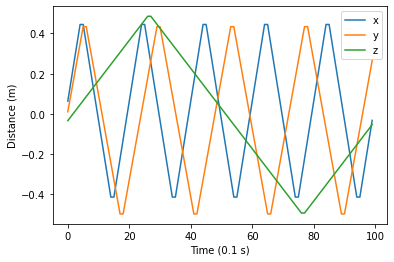

In [120]:
# particle 3
fig, ax = plt.subplots()

ax.plot(range(100), x3, label="x")
ax.plot(range(100), y3, label="y")
ax.plot(range(100), z3, label="z")
plt.xlabel("Time (0.1 s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

- Obtaining the total average pressure at a given temperature.

In [121]:
# obtaining the average directional pressure of the N-body system throughout the simulation for temperature, T
print("The average pressure of the N-body system with temperature ",T,"K is ", sum(P),"Pa")

The average pressure of the N-body system with temperature  1.9589005284498222 K is  3.1052947995344533e-21 Pa


Remark : All particles undergo elastic collisions with the container walls using this simulation. Hence, one can study the pressure in the N-body system of Argon gas particle using this simulation. However, this investigation do not include the whole visualisation for the trajectories of the tested particles due to the amount of particles tested.

#### (a)
Investigating the pressure due temperature of the N-body system containing 20 Argon particles in simulations with 100 increments of time-step $1.0 \times 10^{-11}$s. The modification in temperature is done by doubling the initial velocities of the Argon gas particles in the N-body system about ten times. The initial velocities of the Argon gas particles ranging around $5.0 \times 10^{-8}ms^{-1}$. 

In [59]:
# initialised four empty arrays to store the temperature and the directional pressure for each simulations
T = []
P_x = []
P_y = []
P_z = []

# initialised an N-body system containing 20 Argon gas particles inside a fixed size enclosed container
Ar = N(3,1e-6)
# randomly generate the initial states of all of the particles in the N-body system
Ar.create_body(pos_unit = 1e-7, vel_unit = 1e-7)

# Create ten simulation with different sets of initial velocities for the particles 
for i in range(10):
    # set the total directional pressure for the simulation to be zero
    P_xi = 0
    P_yi = 0
    P_zi = 0
    
    # declare the time-step used which is 0.1s
    dt = 1e-11
    for j in range(len(Ar.Body)):
        # increase the initial velocities of the particles in the system by two fold
        Ar.Body[j].velocity  = Ar.Body[j].velocity * 2
    # Calculate and store the value of temperature of the system
    T.append(temperature(Ar))
    
    # starts the simulation of moving particles in the N-body system
    for i in range(100):
        # update the position and velocity of all the particles in the N-body system
        Ar.full_update(dt, eps, sigma)
        P_xi += pressure(Ar, dt)[0]
        P_yi += pressure(Ar, dt)[1]
        P_zi += pressure(Ar, dt)[2]
    # calculate and store the average value of directional pressure for different length of container 
    P_x.append(P_xi/100)
    P_y.append(P_yi/100)
    P_z.append(P_zi/100)

- Start off by plotting all of the directional pressure ```P_x```, ```P_y``` and ```P_z``` against the temperature of container, ```T```.

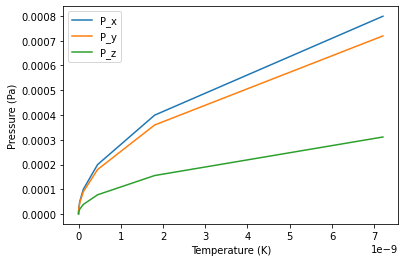

In [60]:
fig, ax = plt.subplots()


ax.plot(T, P_x, label="P_x")
ax.plot(T, P_y, label="P_y")
ax.plot(T, P_z, label="P_z")
plt.ylabel('Pressure (Pa)')
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

- Plot the total pressure in the container, ```P = P_x + P_y + P_z``` against the temperature of gas in the container, ```T```.

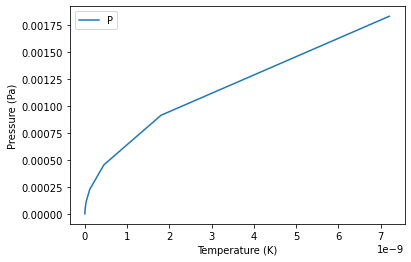

In [61]:
fig, ax = plt.subplots()

P = np.array(P_x) + np.array(P_y) + np.array(P_z)
ax.plot(T, P, label="P")

plt.ylabel('Pressure (Pa)')
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

Remark : The simulations for this investigation use the specifications and conditions similar to those in 3(b). However, this simulation may benefits from some modifications to make the scale for the temperature and pressure to be more sensible. This can be done by changing the range values for the initial velocities of the Argon particles and the time step for the simulations.

#### b)
Investigating the pressure due temperature of the N-body system containing 20 Argon particles in simulations with 100 increments of time-step $1.0 \times 10^{-11}$s. The modification in temperature is done by doubling the initial velocities of the Argon gas particles in the N-body system about ten times. The initial velocities of the Argon gas particles ranging around $5.0 \times 10^{-3}ms^{-1}$.

In [62]:
# initialised four empty arrays to store the temperature and the directional pressure for each simulations
T = []
P_x = []
P_y = []
P_z = []

# initialised an N-body system containing 20 Argon gas particles inside a fixed size enclosed container
Ar = N(3,1e-6)
# randomly generate the initial states of all of the particles in the N-body system
Ar.create_body(pos_unit = 1e-7, vel_unit = 1e-2)

# Create ten simulation with different sets of initial velocities for the particles 
for i in range(10):
    # set the total directional pressure for the simulation to be zero
    P_xi = 0
    P_yi = 0
    P_zi = 0
    
    # declare the time-step used which is 0.1s
    dt = 1e-11
    for j in range(len(Ar.Body)):
        # increase the initial velocities of the particles in the system by two fold
        Ar.Body[j].velocity  = Ar.Body[j].velocity * 2
    # Calculate and store the value of temperature of the system
    T.append(temperature(Ar))
    
    # starts the simulation of moving particles in the N-body system
    for i in range(100):
        # update the position and velocity of all the particles in the N-body system
        Ar.full_update(dt, eps, sigma)
        P_xi += pressure(Ar, dt)[0]
        P_yi += pressure(Ar, dt)[1]
        P_zi += pressure(Ar, dt)[2]
    # calculate and store the average value of directional pressure for different length of container 
    P_x.append(P_xi/100)
    P_y.append(P_yi/100)
    P_z.append(P_zi/100)

- Start off by plotting all of the directional pressure ```P_x```, ```P_y``` and ```P_z``` against the temperature of container, ```T```.

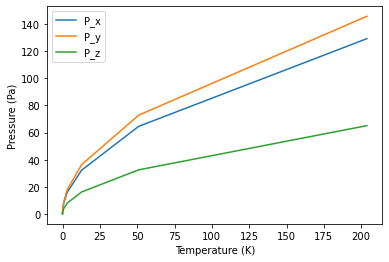

In [63]:
fig, ax = plt.subplots()


ax.plot(T, P_x, label="P_x")
ax.plot(T, P_y, label="P_y")
ax.plot(T, P_z, label="P_z")
plt.ylabel('Pressure (Pa)')
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

- Plot the total pressure in the container, ```P = P_x + P_y + P_z``` against the temperature of gas in the container, ```T```.

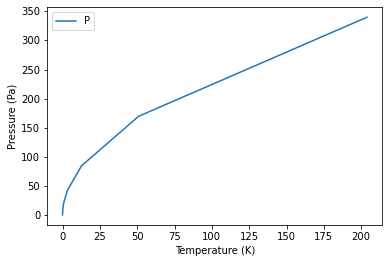

In [64]:
fig, ax = plt.subplots()

P = np.array(P_x) + np.array(P_y) + np.array(P_z)
ax.plot(T, P, label="P")

plt.ylabel('Pressure (Pa)')
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

Remark : Although, the overall trend of the curve is similar to the one obtained in 4(a), the scale for the values of temperature and pressure in 4(b) are more reasonable (e.g not too small).